In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
from pprint import pprint

Change `json_path` here

In [2]:
json_path = './data_balancers_prediction_accuracy.json'

In [3]:
with open(json_path) as f:
    data = json.load(f)
timings = []
for d in data["datapoints"]:
    s = d["setting"]
    comp = list(map(lambda x: (x["computationTime"]),
                   sorted(d["data"]["workers"], key=lambda x: x["rank"])))
    comp = max(comp)
    timings.append((comp, d['data']["balancer"]['time'], s['predictionAccuracy']))

print(len(timings), timings)

18 [(17065490, 3034, -5), (16414914, 3075, -5), (16057425, 4405, -5), (33034995, 4463, -3), (16415916, 5105, -3), (17005006, 10015, -3), (14765818, 45466, -1), (10805831, 46207, -1), (16066753, 71932, -1), (15060091, 45482, 1), (10806239, 46198, 1), (16414938, 71955, 1), (11662649, 406191, 3), (10804483, 424109, 3), (16064161, 625270, 3), (11662265, 1147939, 5), (10801923, 1210956, 5), (16068169, 1761933, 5)]


In [4]:
cpT, balT, predA = zip(*timings)

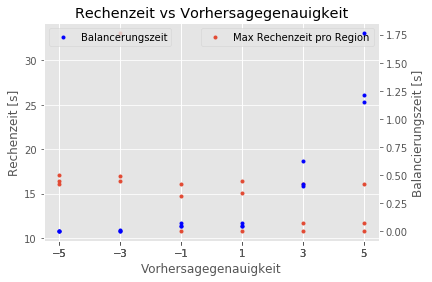

In [7]:
plt.style.use('ggplot')

x = np.asarray(predA)
#  time in s
cp = np.asarray(cpT) / 1e6
bal = np.asarray(balT) / 1e6


fig, host = plt.subplots()
par1 = host.twinx()

host.plot(x, cp, label="Max Rechenzeit pro Region", lw=0, marker=".")
par1.plot(x, bal, label="Balancerungszeit", lw=0, marker=".", color='b')

host.set(xlabel='Vorhersagegenauigkeit', ylabel='Rechenzeit [s]',
    title='Rechenzeit vs Vorhersagegenauigkeit'
)
#host.axis([None, None, 0, 15])

par1.set(ylabel='Balancierungszeit [s]')
#par1.axis([None, None, 0, 3])
par1.grid(False)


host.legend()
par1.legend()
host.grid(True)
plt.xticks(x)

#fig.savefig("scaling_graph.svg", format="svg")
plt.show()